In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
from gluonnlp.data import SentencepieceTokenizer

In [8]:
data_path = 'C:/nlp/tensorflow-ml-nlp-tf2/7.PRETRAIN_METHOD/data_in/KOR/NER/'
op = "C:/nlp/tensorflow-ml-nlp-tf2/7.PRETRAIN_METHOD/data_out/"

train_path = os.path.join(data_path, "train.tsv")
test_path = os.path.join(data_path, "test.tsv")
label_path = os.path.join(data_path, "label.txt")

In [14]:
def read_file(input_path):
    with open(input_path, "r", encoding="utf-8") as f:
        sentences = []
        labels = []
        for line in f:
            split_line = line.strip().split("\t")
            sentences.append(split_line[0])
            labels.append(split_line[1])
        return sentences, labels
    
train_sentences, train_labels = read_file(train_path)
test_sentences, test_labels = read_file(test_path)
ner_sentences = train_sentences + test_sentences
ner_labels = train_labels + test_labels

ner_dict = {"sentence": ner_sentences, "label": ner_labels}
ner_df = pd.DataFrame(ner_dict)

In [19]:
print(f'ner_df: {len(ner_df)}')

ner_df: 90000


In [20]:
ner_df.head(10)

,sentence,label
0,"금석객잔 여러분, 감사드립니다 .",ORG-B O O O
1,이기범 한두 쪽을 먹고 10분 후쯤 화제인을 먹는 것이 좋다고 한다 .,PER-B O O O TIM-B TIM-I CVL-B O O O O O
2,7-8위 결정전에서 김중배 무스파타(샌안토니오)가 참은 법국을 누르고 유럽축구선수권...,EVT-B EVT-I PER-B PER-I O LOC-B O EVT-B CVL-B O O
3,스코틀랜드의 한 마을에서 보통하게 살고 있다는 이 기혼 남성의 시조가 유튜브 등에서...,LOC-B NUM-B NUM-I O O O O O O O O O O O O O CV...
4,보니까 저 옆에 사조가 있어요 .,O O O O O O
5,24회 최경운호의 좌익선상 28루타로 포문을 연 한화는 후속 서동원이 적시타를 날려...,NUM-B PER-B O NUM-B O O ORG-B O PER-B O O O O O
6,바둑선수가 묘하게 닮았는데요 .,CVL-B O O O
7,▲ '新플레이메이커' NO.7 박하성 - 1경기 30골30도움공수 운동경기가 풀리지...,O CVL-B NUM-B PER-B O NUM-B NUM-B O O O O O O ...
8,우려는 비현실이 됐다 .,O O O O
9,(이석무 귀재 smlee@mydaily.co.kr),PER-B CVL-B TRM-B


In [22]:
train_set = pd.Series(ner_df["sentence"].tolist())
print(f'유일한 총 문장 수 : {(len(np.unique(train_set)))}')
print(f'반복해서 나타나는 문장의 수: {np.sum(train_set.value_counts() > 1)}')

유일한 총 문장 수 : 88703
반복해서 나타나는 문장의 수: 288


In [23]:
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))

In [50]:
print(f'문장 단어 개수 최대: {np.max(train_word_counts)}')
print(f'문장 단어 개수 평균: {np.mean(train_word_counts):2f}')
print(f'문장 단어 개수 표준편차: {np.std(train_word_counts):2f}')
print(f'문장 단어 개수 중간 값: {np.median(train_word_counts)}')
print(f'문장 단어 개수 제 1사분위: {np.percentile(train_word_counts, 25)}')
print(f'문장 단어 개수 제 3사분위: {np.percentile(train_word_counts, 75)}')
print(f'문장 단어 개수 제 99%: {np.percentile(train_word_counts, 99)}')


문장 단어 개수 최대: 175
문장 단어 개수 평균: 11.817456
문장 단어 개수 표준편차: 7.033081
문장 단어 개수 중간 값: 10.0
문장 단어 개수 제 1사분위: 7.0
문장 단어 개수 제 3사분위: 15.0
문장 단어 개수 제 99%: 35.0


Text(0, 0.5, 'Probability')

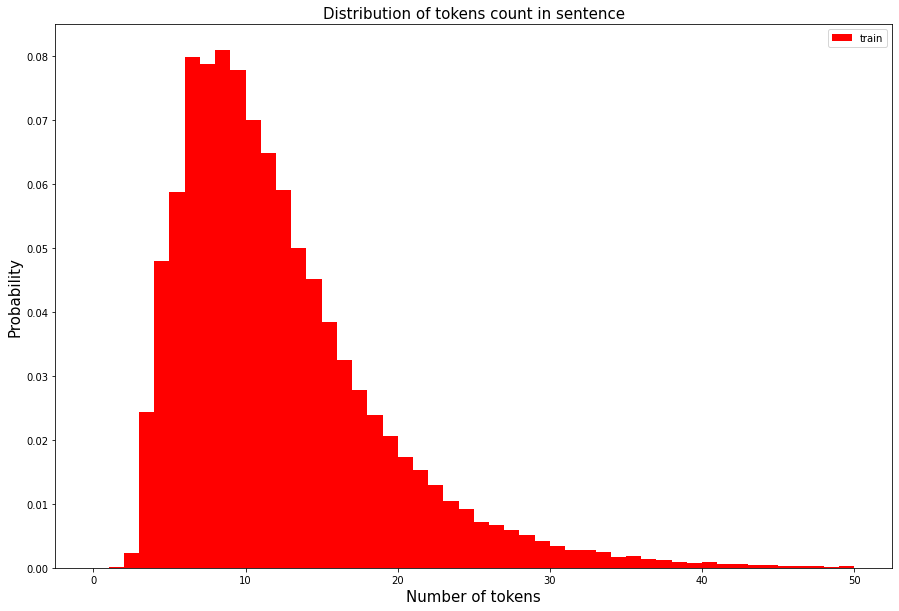

In [38]:
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, range= [0, 50], facecolor = 'r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x22244cd6c50>,
 'caps': [<matplotlib.lines.Line2D at 0x22244ce5278>,
 'boxes': [<matplotlib.lines.Line2D at 0x22244cd6c18>],
 'medians': [<matplotlib.lines.Line2D at 0x22244ce5828>],
 'fliers': [<matplotlib.lines.Line2D at 0x22244ce5da0>],
 'means': [<matplotlib.lines.Line2D at 0x22244cbf860>]}

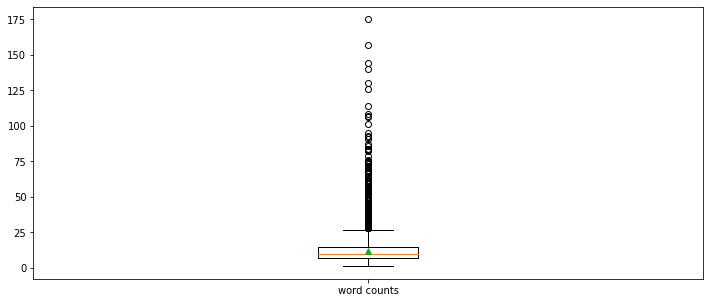

In [33]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['word counts'],
             showmeans=True)

In [34]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir = 'bert_ckpt', do_lower_case = False)

In [35]:
train_bert_token = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

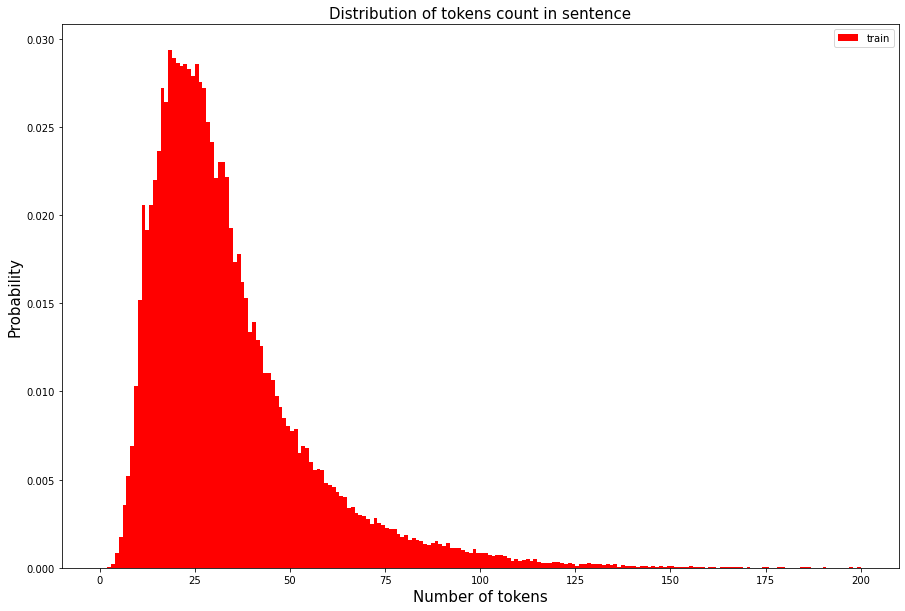

In [37]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)


{'whiskers': [<matplotlib.lines.Line2D at 0x22245b23710>,
 'caps': [<matplotlib.lines.Line2D at 0x22244d45f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x22245b23438>],
 'medians': [<matplotlib.lines.Line2D at 0x22244d61c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22244d7f240>],
 'means': [<matplotlib.lines.Line2D at 0x22244d6f240>]}

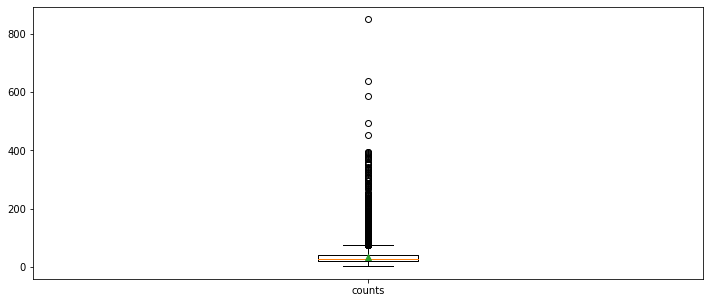

In [40]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token,
             labels=['counts'],
             showmeans=True)

In [47]:
print(f'문장 token 개수 최대: {np.max(train_bert_token)}')
print(f'문장 token 개수 평균: {np.mean(train_bert_token):.2f}')
print(f'문장 token 개수 표준편차: {np.std(train_bert_token):.2f}')
print(f'문장 token 개수 중간 값: {np.median(train_bert_token)}')
print(f'문장 token 개수 제 1사분위: {np.percentile(train_bert_token, 25)}')
print(f'문장 token 개수 제 3사분위: {np.percentile(train_bert_token, 75)}')
print(f'문장 token 개수 제 99%: {np.percentile(train_bert_token, 99)}')

문장 token 개수 최대: 850
문장 token 개수 평균: 33.62
문장 token 개수 표준편차: 22.76
문장 token 개수 중간 값: 28.0
문장 token 개수 제 1사분위: 19.0
문장 token 개수 제 3사분위: 41.0
문장 token 개수 제 99%: 111.0
